In [1]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme = "oceans16")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
item_date = []
item_number = []
for a in range(792) :
    r = requests.get('https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI&page=%d'% a)
    c = r.content
    soup = BeautifulSoup(c, "html.parser")
    
    all = soup.find_all("tr")
    
    date = soup.find_all("td", {"class" : "date"})
    for item in date :
        item_date.append(item.text)
        
    number = soup.find_all("td", {"class" : "number_1"})
    for a in range(len(number)) :
        for item in number[a] :
            if a%4 == 0 :
                item_number.append(float(item.replace(",","")))
            else :
                pass

In [4]:
item_number.reverse()

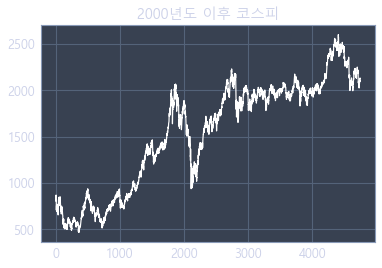

In [5]:
plt.title("2000년도 이후 코스피")
plt.plot(item_number,'w')
plt.show()

In [8]:
import pandas as pd

In [11]:
data = {
    "날짜": item_date,
    "종가": item_number,
}
columns = ["날짜","종가"]
df = pd.DataFrame(data, columns=columns)
df.head()

,날짜,종가
0,2019.06.21,860.94
1,2019.06.20,846.44
2,2019.06.19,830.16
3,2019.06.18,804.35
4,2019.06.17,837.38


In [13]:
df.to_csv('KOSPI.csv', sep = ',', encoding = 'UTF-8')